<a href="https://colab.research.google.com/github/NishatVasker/University_Projects/blob/master/poultry_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/poultry-20240405T173706Z-001.zip

Archive:  /content/poultry-20240405T173706Z-001.zip
  inflating: poultry/rotten/busuk_0215.jpg  
  inflating: poultry/rotten/busuk_0016.jpg  
  inflating: poultry/rotten/busuk_0077.jpg  
  inflating: poultry/rotten/busuk_0013.jpg  
  inflating: poultry/rotten/busuk_0201.jpg  
  inflating: poultry/rotten/busuk_0096.jpg  
  inflating: poultry/rotten/busuk_0166.jpg  
  inflating: poultry/rotten/busuk_0008.jpg  
  inflating: poultry/rotten/busuk_0144.jpg  
  inflating: poultry/rotten/busuk_0050.jpg  
  inflating: poultry/rotten/busuk_0142.jpg  
  inflating: poultry/rotten/busuk_0043.jpg  
  inflating: poultry/rotten/busuk_0155.jpg  
  inflating: poultry/rotten/busuk_0216.jpg  
  inflating: poultry/rotten/busuk_0108.jpg  
  inflating: poultry/rotten/busuk_0139.jpg  
  inflating: poultry/rotten/busuk_0075.jpg  
  inflating: poultry/rotten/busuk_0045.jpg  
  inflating: poultry/rotten/busuk_0079.jpg  
  inflating: poultry/rotten/busuk_0062.jpg  
  inflating: poultry/rotten/busuk_0089.jpg  
  i

In [3]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM, Conv2D, MaxPooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2


In [4]:
dir = '/content/poultry'
labels = os.listdir(dir)
labels

['fresh', 'rotten']

In [5]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

fresh 109
rotten 21


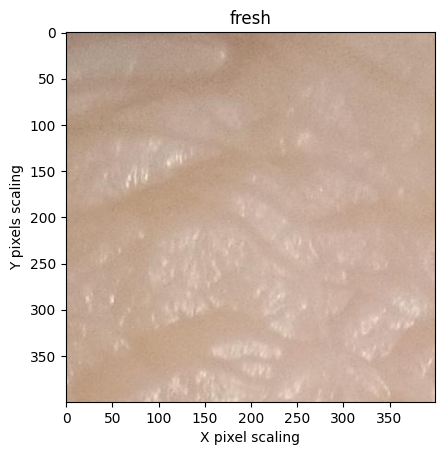

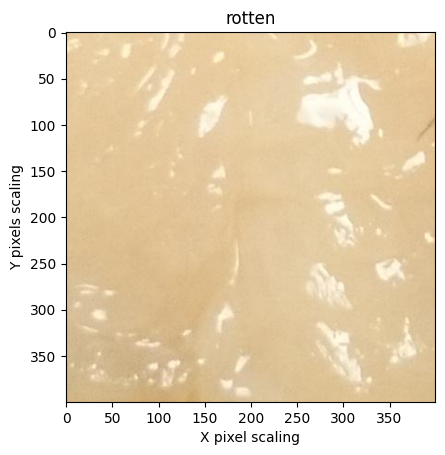

In [6]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [7]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

fresh_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
rotten_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)


Found 105 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


Found 130 images belonging to 2 classes.


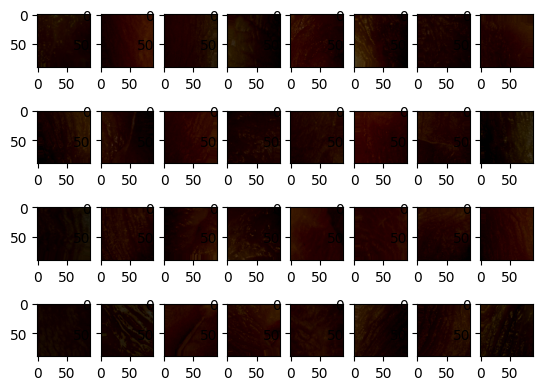

In [9]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(90,90),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [15]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))##class number,in example i have 2 classes so i have given 2

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model = model.fit(
    fresh_data,
    epochs=500,
    steps_per_epoch=len(fresh_data),
    validation_data=rotten_data,  # Corrected argument for validation data
    validation_steps=len(rotten_data)  # Use len(rotten_data) for validation steps
)


Epoch 1/500
4/4 [==============================] - 2s 248ms/step - loss: 0.6725 - accuracy: 0.8000 - val_loss: 0.6354 - val_accuracy: 0.8400
Epoch 2/500
4/4 [==============================] - 1s 114ms/step - loss: 0.5964 - accuracy: 0.8381 - val_loss: 0.5065 - val_accuracy: 0.8400
Epoch 3/500
4/4 [==============================] - 1s 199ms/step - loss: 0.4727 - accuracy: 0.8381 - val_loss: 0.4384 - val_accuracy: 0.8400
Epoch 4/500
4/4 [==============================] - 1s 223ms/step - loss: 0.4772 - accuracy: 0.8381 - val_loss: 0.4681 - val_accuracy: 0.8400
Epoch 5/500
4/4 [==============================] - 1s 186ms/step - loss: 0.4742 - accuracy: 0.8381 - val_loss: 0.4156 - val_accuracy: 0.8400
Epoch 6/500
4/4 [==============================] - 1s 138ms/step - loss: 0.4307 - accuracy: 0.8381 - val_loss: 0.4121 - val_accuracy: 0.8400
Epoch 7/500
4/4 [==============================] - 1s 135ms/step - loss: 0.4435 - accuracy: 0.8381 - val_loss: 0.4366 - val_accuracy: 0.8400
Epoch 8/500
4

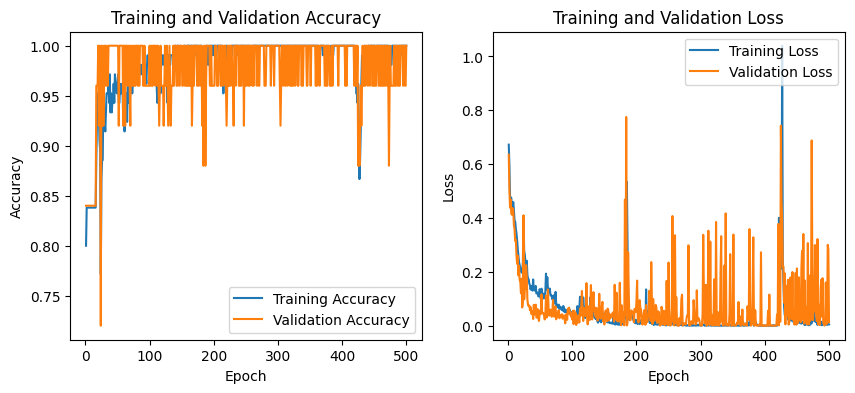

In [16]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
score = model.evaluate(fresh_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 105ms/step - loss: 0.0036 - accuracy: 1.0000
Test loss: 0.0035850275307893753
Test accuracy: 1.0


In [19]:
score = model.evaluate(rotten_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 236ms/step - loss: 0.0083 - accuracy: 1.0000
Test loss: 0.008260773494839668
Test accuracy: 1.0


In [26]:
# Evaluate the model on the train, test, and validation data
train_acc = model.evaluate(fresh_data, verbose=0)[1]
test_acc = model.evaluate(rotten_data, verbose=0)[1]

# Print out the validation accuracies for the train, test, and validation data
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
print('Validation accuracy:', val_acc)

Train accuracy: 1.0
Test accuracy: 1.0
Validation accuracy: [0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.9599999785423279, 0.9599999785423279, 0.9599999785423279, 1.0, 0.9200000166893005, 1.0, 0.9599999785423279, 0.7200000286102295, 1.0, 0.9200000166893005, 1.0, 0.9200000166893005, 0.9599999785423279, 1.0, 1.0, 0.9599999785423279, 0.9599999785423279, 1.0, 0.9599999785423279, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9200000166893005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9200000166893005, 1.0, 1.0, 0.9200000166893005, 1.0, 1.0, 1.0, 0.9599999785423279, 1.0, 1.0, 0.9599999785423279, 0.9200000166893005, 1.0, 1.0, 0.9599999785423279, 0.9599999785423279, 1.0, 0.9599999785423279, 1.0,

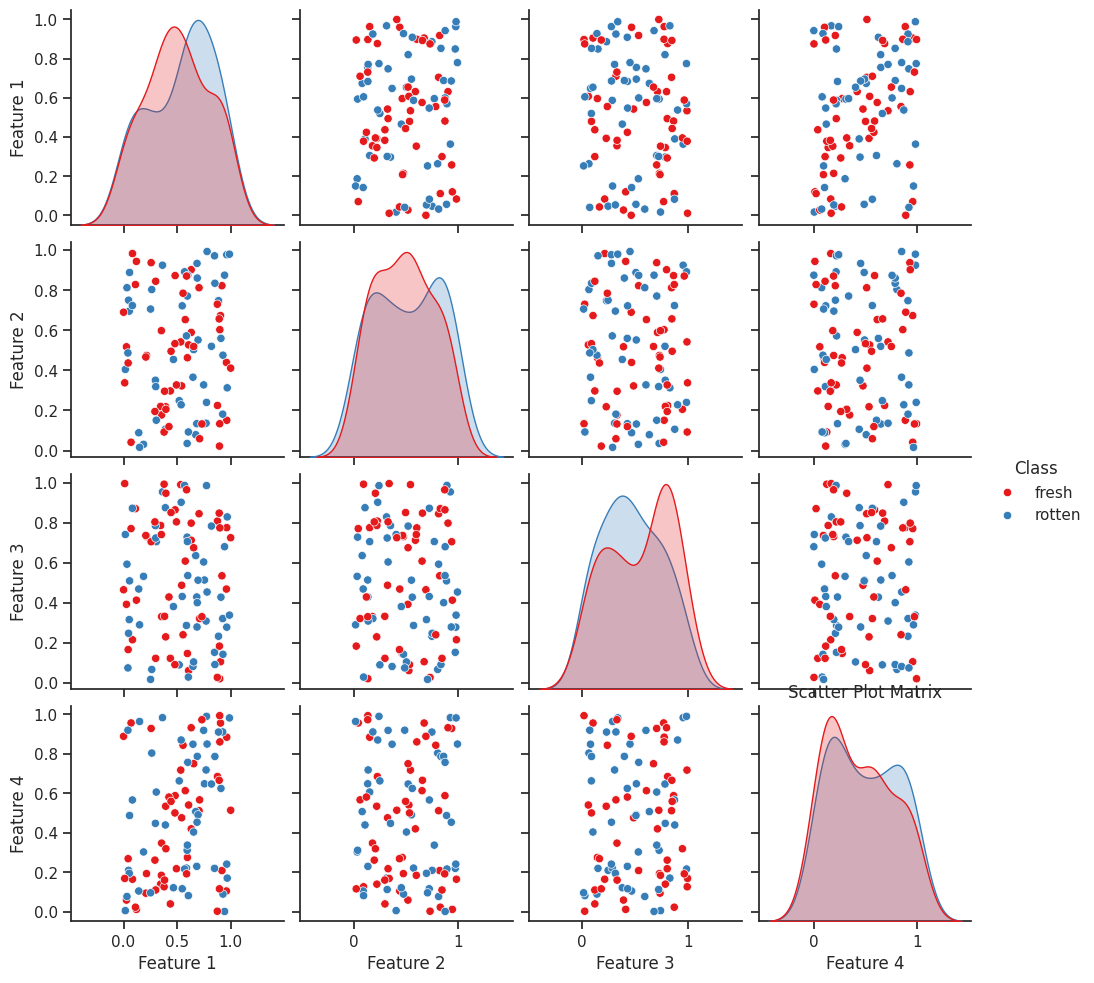

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
class_labels = ['fresh', 'rotten']
data = pd.DataFrame(np.random.rand(100, 4), columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
data['Class'] = np.random.choice(class_labels, size=100)

# Create a scatter plot matrix
sns.set(style="ticks")
sns.pairplot(data, hue='Class', palette='Set1')
plt.title('Scatter Plot Matrix')
plt.show()



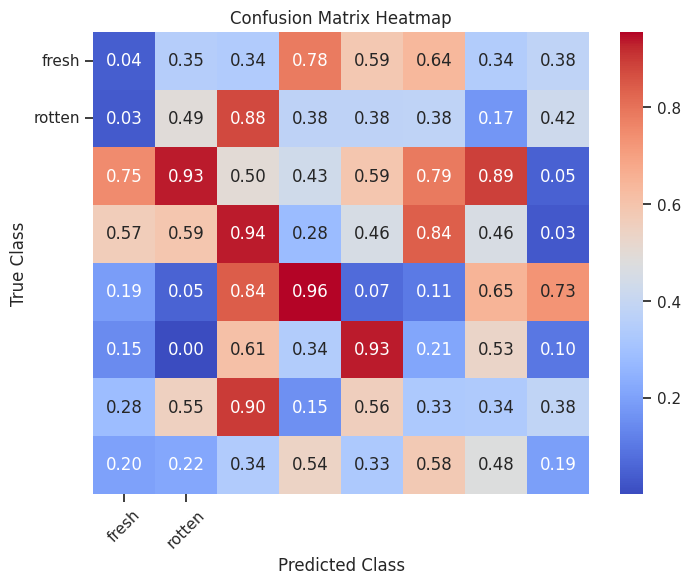

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
class_labels =  ['fresh', 'rotten']
data = np.random.rand(8, 8)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap')
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.show()


58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                       

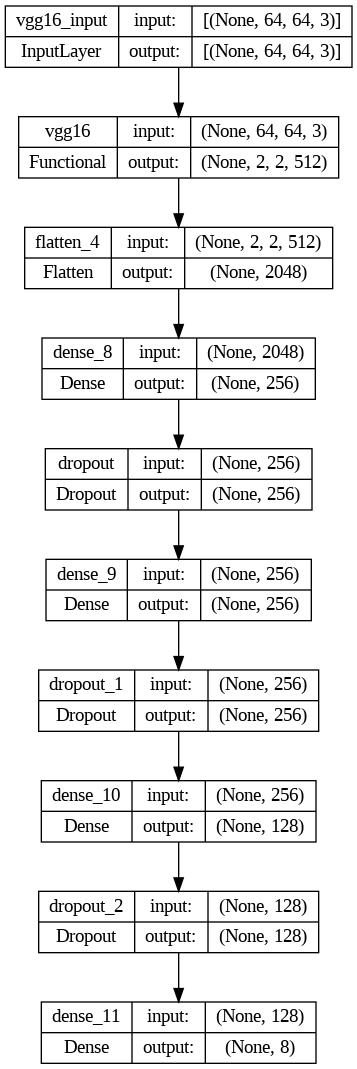

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))  # Update the number of units to 8 for 8 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Save the model architecture to a file
plot_model(model, to_file='model.png', show_shapes=True)


In [39]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

In [43]:
!pip install gradio --upgrade


In [46]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [60]:
from google.colab import files
from PIL import Image
import numpy as np
from tensorflow.keras.models import Sequential  # Make sure your model is defined

# Assuming your model is already defined and compiled
# model = ...

# Upload an image file
uploaded = files.upload()

# Get the uploaded image file name
image_path = next(iter(uploaded))

# Load and preprocess the image
image = Image.open(image_path)
image = image.resize((64, 64))  # Resize the image to match the input shape of the model
image_array = np.array(image) / 255.0  # Normalize the image

# Reshape the image array for the model
image_array = np.expand_dims(image_array, axis=0)

# Make predictions using the model
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions[0])

# Define the class labels
class_labels = ['fresh', 'rotten']

# Display the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)


Saving segar_1450.jpg to segar_1450.jpg
1/1 [==============================] - 0s 76ms/step
Predicted class: fresh


In [61]:
from google.colab import files
from PIL import Image
import numpy as np
from tensorflow.keras.models import Sequential  # Ensure your model is defined

# Assuming your model is already defined and compiled
# model = ...

# Define a function for prediction
def predict_image(model, class_labels):
    # Upload an image file
    uploaded = files.upload()
    if not uploaded:
        print("File upload cancelled.")
        return False  # Break the loop if no file is selected

    # Get the uploaded image file name
    image_path = next(iter(uploaded))

    # Load and preprocess the image
    image = Image.open(image_path)
    image = image.resize((64, 64))  # Resize the image to match the input shape of the model
    image_array = np.array(image) / 255.0  # Normalize the image

    # Reshape the image array for the model
    image_array = np.expand_dims(image_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions[0])

    # Display the predicted class label
    predicted_class_label = class_labels[predicted_class_index]
    print("Predicted class:", predicted_class_label)
    return True  # Continue the loop if prediction is made

# Interactive loop for predictions
while True:
    print("\nUpload an image for prediction, or cancel to stop.")
    if not predict_image(model, ['fresh', 'rotten']):
        break



Upload an image for prediction, or cancel to stop.


Saving busuk_0073.jpg to busuk_0073.jpg
1/1 [==============================] - 0s 110ms/step
Predicted class: rotten

Upload an image for prediction, or cancel to stop.


Saving segar_1550.jpg to segar_1550.jpg
1/1 [==============================] - 0s 65ms/step
Predicted class: rotten

Upload an image for prediction, or cancel to stop.


Saving segar_1496.jpg to segar_1496.jpg
1/1 [==============================] - 0s 68ms/step
Predicted class: rotten

Upload an image for prediction, or cancel to stop.


KeyboardInterrupt: 

In [62]:
pip install flask


In [70]:
import gradio as gr
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np


import gradio
print(gradio.2.9.4)



class_labels = ['fresh', 'rotten']

def classify_image(image):
    image = Image.fromarray(image.astype('uint8'), 'RGB')
    image = image.resize((64, 64))  # Resize to match the model input
    image_array = np.array(image) / 255.0  # Normalize the image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)
    return {class_labels[i]: float(predictions[0][i]) for i in range(len(class_labels))}

# Create the Gradio interface
iface = gr.Interface(fn=classify_image,
                     inputs=gr.inputs.Image(shape=(64, 64)),
                     outputs=gr.outputs.Label(num_top_classes=2),
                     title="Image Classification",
                     description="Upload an image to classify it as fresh or rotten.")

# Launch the application
iface.launch()


AttributeError: module 'gradio' has no attribute 'inputs'